In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random

# Sentiment file load

In [13]:
file_path = '/Users/admin/Desktop/Data_Engineering/W2/Project 1/WordCloud/training.1600000.processed.noemoticon.csv'

# 없었던 column name 추가 및 불필요한 column name 추가

In [14]:
# CSV 파일 읽기
df = pd.read_csv(file_path, encoding='latin-1')
df.columns.values[0] = 'sentiment'
df.columns.values[5] = 'text'
df = df[['sentiment', 'text']]
df

,sentiment,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1599994,4,Just woke up. Having no school is the best fee...
1599995,4,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,Happy 38th Birthday to my boo of alll time!!! ...


# Positive sentiment sampling

In [16]:
positive_samples = df[df['sentiment'] == 4].sample(n=1000, random_state=random.randint(10, 99))
positive_samples

,sentiment,text
943900,4,@sonnygill Thanks so much! @travishines - If y...
873983,4,(@wutl) Success!! Note to self: somehow must m...
1302117,4,@ejhildreth Stone Cold vs. Bret at Mania #12 a...
1596989,4,"i have a flatttt. well, a room in a flat... si..."
1247176,4,I love how boys are so understanding and don't...
...,...,...
1512513,4,@NoRestrictions The trailer looks pretty inte...
1078799,4,"YEAH ! GO LAKERS ! Finish Nuggets ,"
959372,4,It's sunday and I can't wait for Wednesday sti...
1400793,4,See that purrrrrtty background picture on my p...


# Negative sentiment sampling

In [6]:
negative_samples = df[df['sentiment'] == 0].sample(n=1000, random_state=random.randint(10, 99))
negative_samples

,sentiment,text
582032,0,Also used &quot;copy and paste&quot; for last ...
348392,0,@AdamSchwabe ooohhh adam. i'm sorry to hear ab...
461333,0,Lmao show off but but i need your help picking...
581573,0,@paramoreband It will never be the same if she...
577316,0,@ddlovato i really wanted go.. but i live far ...
...,...,...
201465,0,@DJSTUPAC dont look like imma be able to make...
466027,0,Mondaymorning startup problems. Getting Guestl...
347875,0,@bigkapitol yes sir... I could go for some ses...
705038,0,@libertygirle BRB...my turn at the doc


# Dataframe의 text join

In [17]:
positive_texts = ' '.join(positive_samples['text'])
negative_texts = ' '.join(negative_samples['text'])

# WordCloud 생성

In [34]:
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', colormap='magma', max_words=200).generate(positive_texts)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', colormap='magma', max_words=200).generate(negative_texts)

# Positive, Negative WordCloud Plot

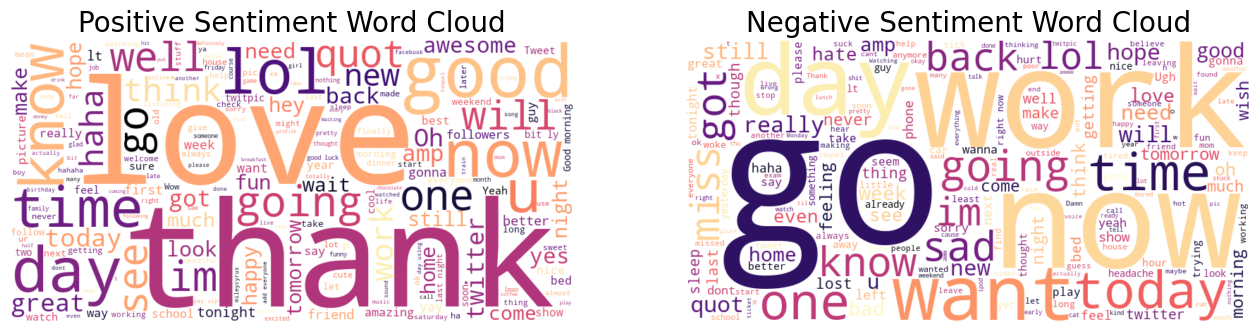

In [35]:
# 플롯 그리기
plt.figure(figsize=(16, 8))

# 긍정적 워드 클라우드
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud', fontsize=20)

# 부정적 워드 클라우드
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud', fontsize=20)

plt.show()
